This script uses the *.yaml files produced by the PR when compiled with the `__DEBUG_SBAND_DETECTOR` option.

The simplest way to test sample data is to compile the PR with `__DEBUG_SBAND_DETECTOR` (uncomment in `num_pipeline_sband_freq_counter.h` or set on the command line), then run the binary `process` (from app/process.cpp) with a NEPI JSON file on the command line:

    ./process 30RPM-SBT_1_std_2019_04_29_212650.543.json



Then point `yaml_path` in this workbook to the appropriate location.

In [32]:
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [77]:
def load_yaml( filename, node = None, flatten = False ):
    
    f = cv2.FileStorage(filename, cv2.FILE_STORAGE_READ )
    if not f.isOpened():
        raise Exception;
    
    
    if node:
        data = f.getNode(node)
    else:
        data = f.getFirstTopLevelNode()
                
    if flatten:
        return np.reshape(data.mat(), -1)
        
    return data.mat()
    

Final output:  [ 20  40 121 115  62  82 102  95   4  23]


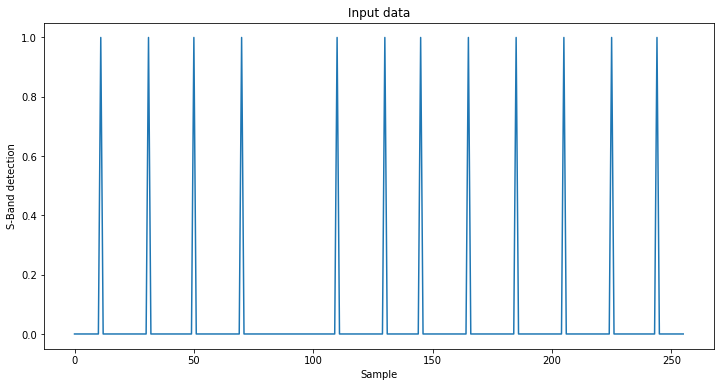

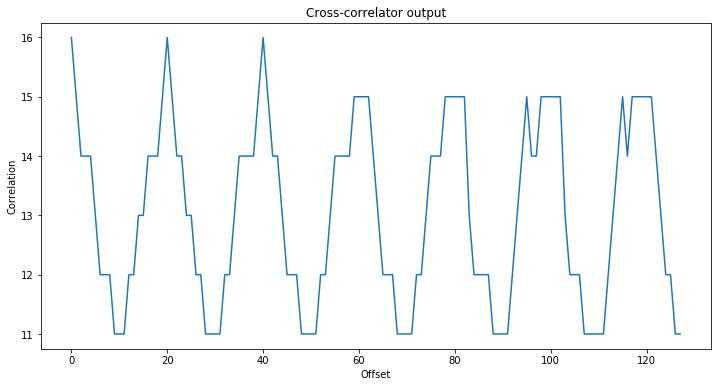

In [100]:
yaml_path = "../../../bionic-melodic-workspace/"

# flatFile = cv2.FileStorage( yaml_path + "flat.yaml", cv2.FILE_STORAGE_READ)
# flat = flatFile.getNode("flat").mat()
# flat = np.reshape(flat,-1)

flat = load_yaml( yaml_path + "flat.yaml", flatten=True )
xcorr = load_yaml( yaml_path + "xcorr_final.yaml", flatten=True )
minrpms = load_yaml( yaml_path + "minrpms.yaml", flatten=True )
final = load_yaml( yaml_path + "final.yaml", flatten=True )


plt.figure(figsize=(12, 6))
plt.plot(flat);
plt.xlabel('Sample')
plt.ylabel('S-Band detection')
plt.title("Input data")

plt.figure(figsize=(12, 6))
plt.plot(xcorr);
plt.xlabel('Offset')
plt.ylabel('Correlation')
plt.title("Cross-correlator output")

# plt.figure(figsize=(12, 6))
# plt.plot(minrpms);


print("Final output: ", final)


